In [1]:
from highz_exp.s_params import S_Params
import os
import glob
from os.path import join as pjoin

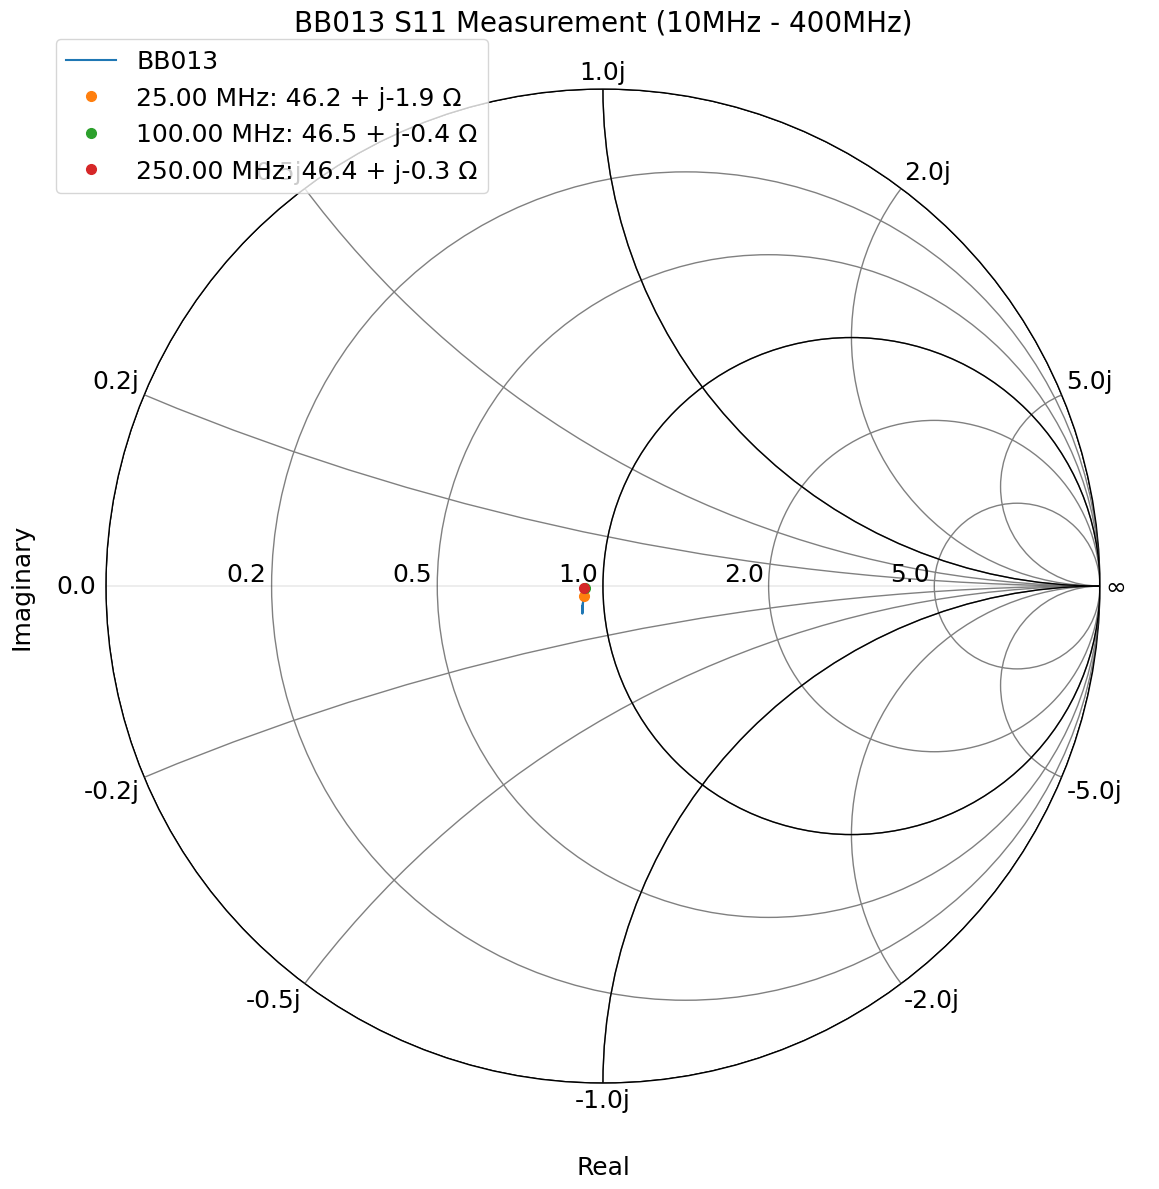

In [7]:
# plot BB and ND s11s
BB_file = pjoin("TinyVNA_Calibration", "S11_Measurements", "BB013_on.s1p")
save_dir = pjoin("TinyVNA_Calibration", "S11_Plots")
sparam = S_Params(BB_file, labels=['BB013'])
sparam.plot_smith_chart(title='BB013 S11 Measurement (10MHz - 400MHz)', save_dir=save_dir, suffix='BB013',
                        freq_range=(10e6, 400e6),
                        marker_freq=[25e6, 100e6, 250e6])

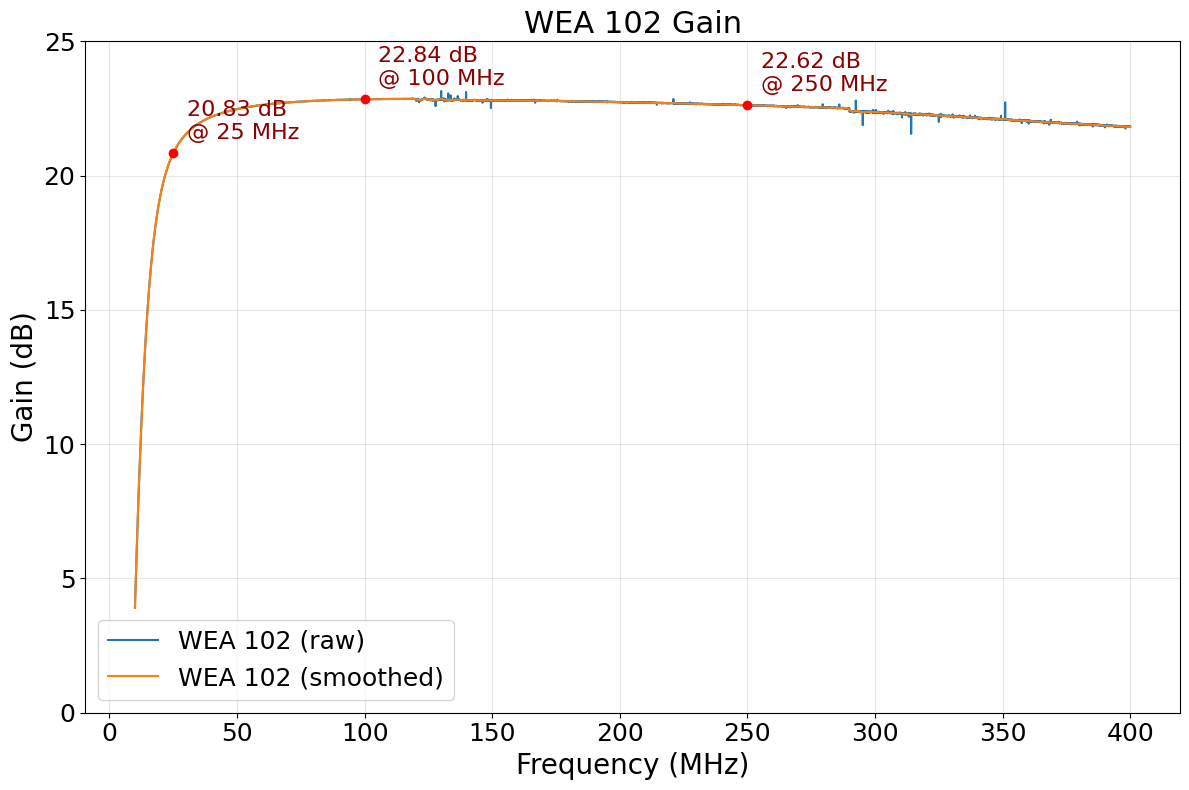

In [2]:
# plot all s21 files
WEA_file = pjoin('S21Measurements', 'WEA102_20dB.s2p')
save_dir = pjoin('S21Measurements', 'plots')
sparam = S_Params(WEA_file, labels=['WEA 102'])
sparam.plot_gain(attenuation=20, title='WEA 102 Gain', ymin=0, ymax=25,
                 marker_freqs=[25, 100, 250], save_path=pjoin(save_dir, 'WEA_102_Gain.png'),
                 smoothing=True, smoothing_kwargs={'window':60})

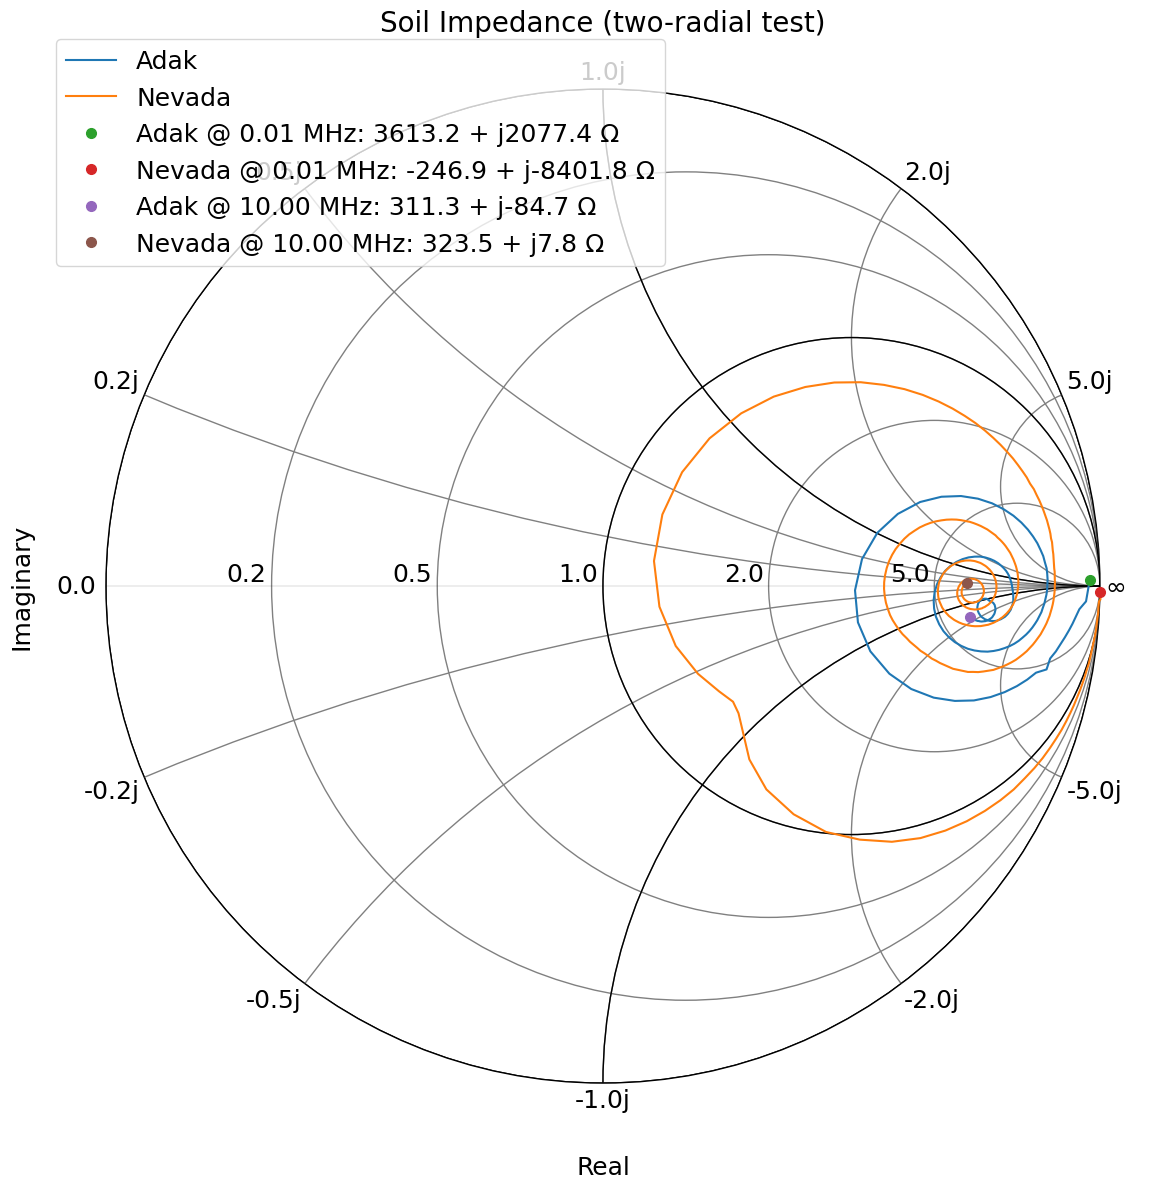

In [3]:
# soil impedance files
soil_file = pjoin('ground_impedance', '10k_500M.s1p')
nevada_file = pjoin('ground_impedance', 'Nevada', 'DipoleAntennaHighResolution.s1p')
plot_dir = pjoin('ground_impedance', 'plots')
sparam = S_Params([soil_file, nevada_file], labels=['Adak', 'Nevada'])
sparam.plot_smith_chart(title='Soil Impedance (two-radial test)', save_dir=plot_dir,
                        suffix='10k_10MHz_comparison', freq_range=(10e3, 10e6), 
                        marker_freq=[10e3, 10e6])

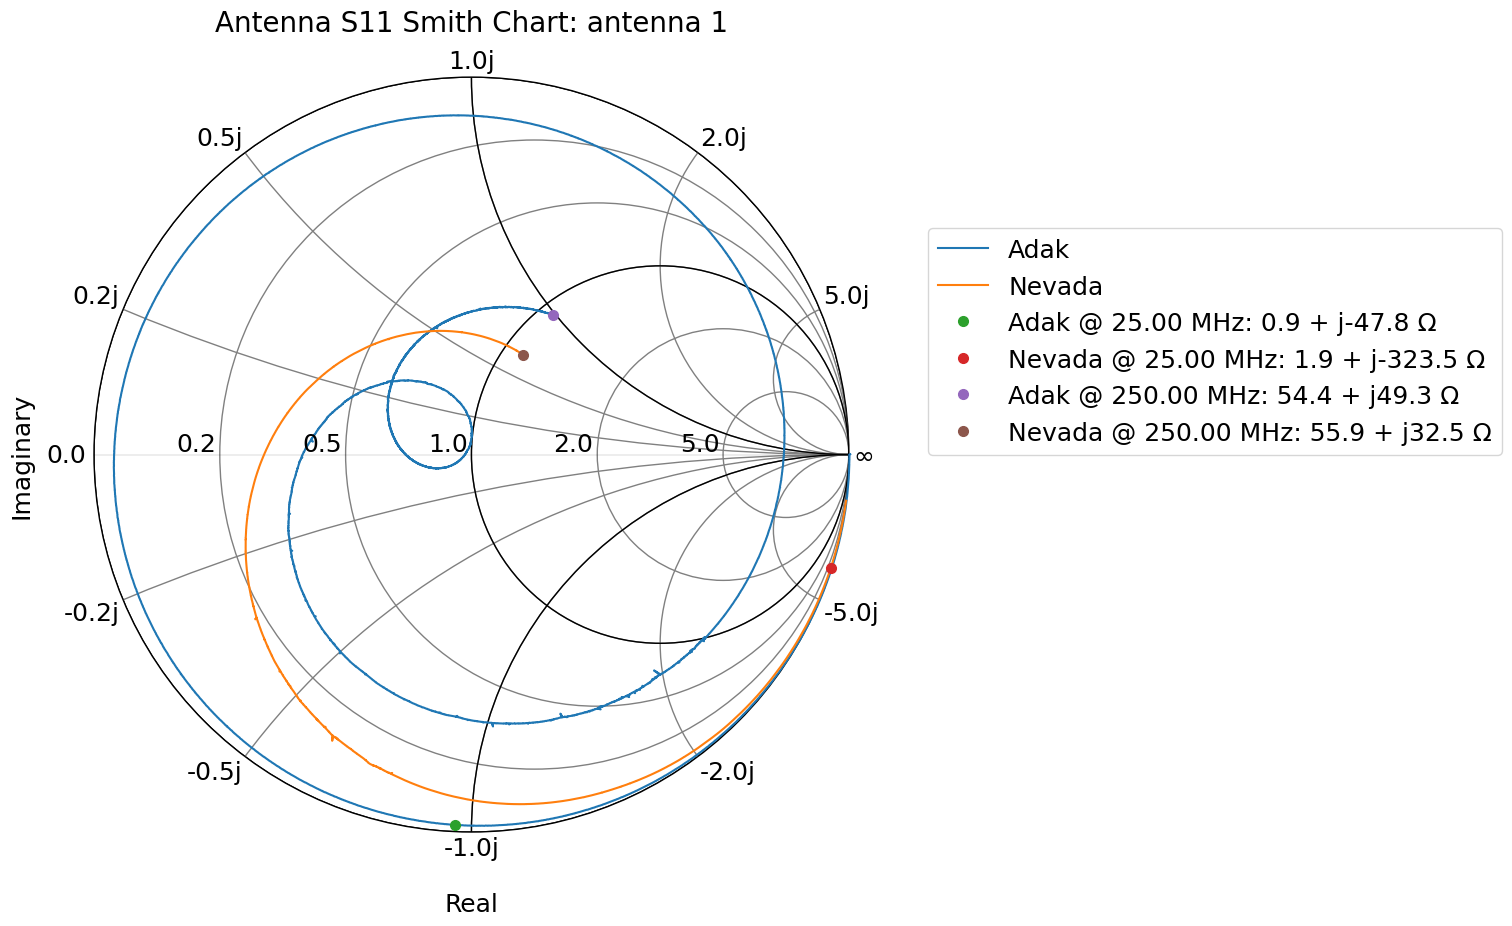

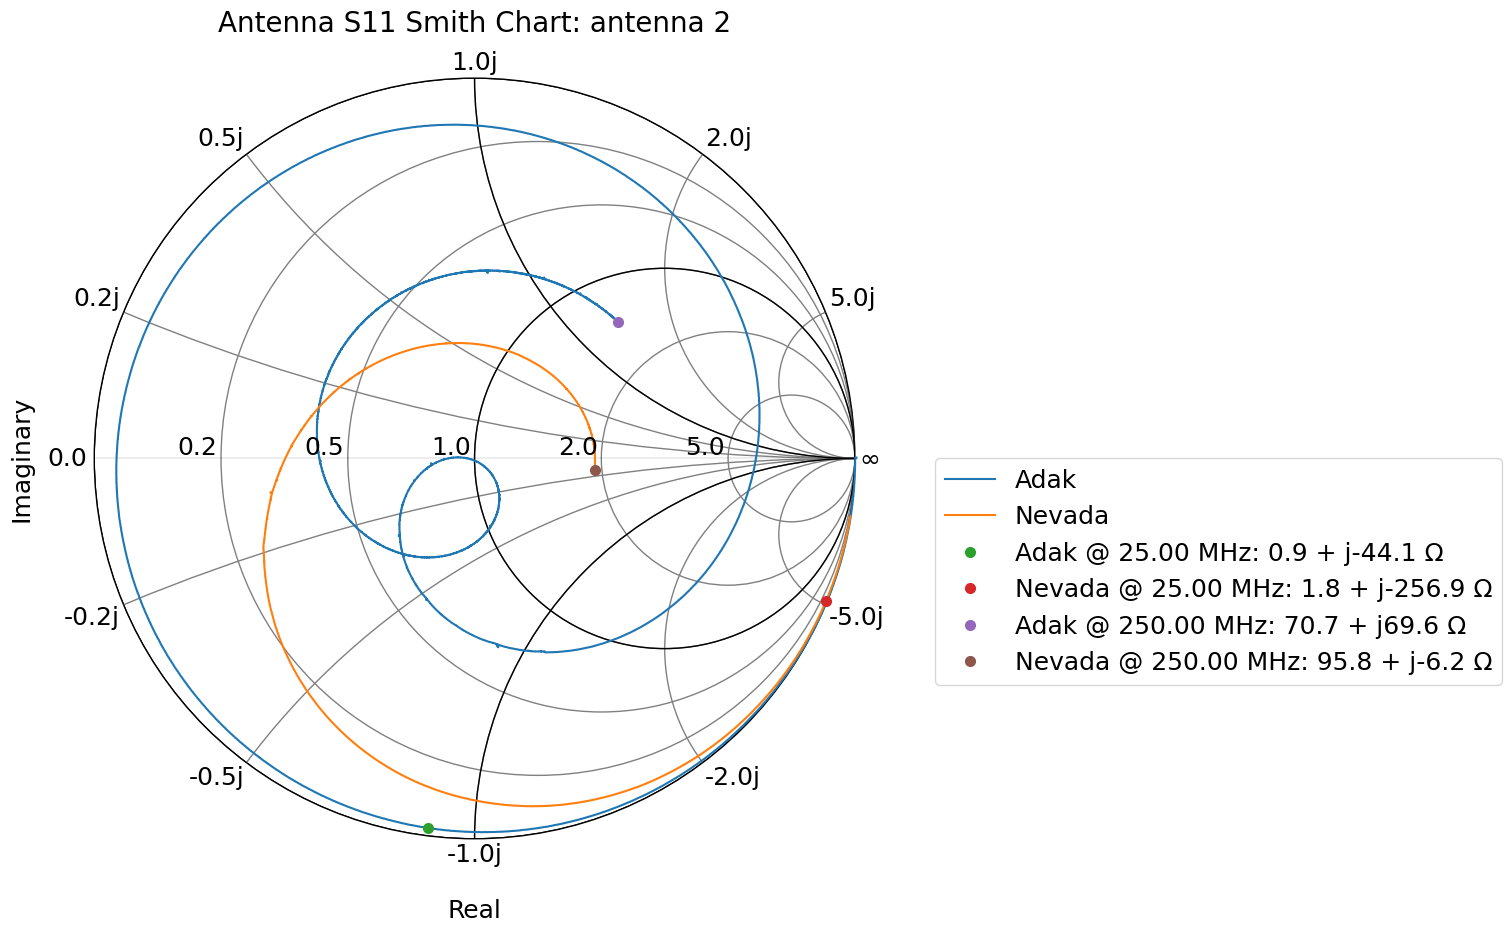

In [ ]:
# antenna files
adak_files = glob.glob(pjoin('impedance', '*.s1p'))
nevada_files = glob.glob(pjoin('antenna_S11', 'Nevada', '*.s1p'))
plot_dir = pjoin('antenna_S11', 'plots')
for i in range(1, 5):
    adak = glob.glob(pjoin('antenna_S11', f'Ant{i}_far.s1p'))[0]
    nevada = glob.glob(pjoin('antenna_S11', 'Nevada', f'antenna{i}.s1p'))[0]
    sparam = S_Params([adak, nevada], labels=[f'Adak', f'Nevada'])
    # sparam.plot_reflection_loss(db=True, title=f'Antenna S11: {os.path.basename(afile)}', ymax=0, ymin=-50, show_phase=False, attenuation=0, 
    #                            save_dir=plot_dir, suffix=afile.split('/')[-1].replace('.s1p',''))
    sparam.plot_smith_chart(title=f'Antenna S11 Smith Chart: antenna {i}', save_dir=plot_dir, suffix=f'antenna_{i}',
                            marker_freq=[25e6, 250e6])